In [1]:
import pandas as pd

In [10]:
data = pd.read_csv('data/wine_cleared.csv')

In [3]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
data['price_round'] = data['price'].round().astype(int) #для удобства, ->int

In [12]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [81]:
data['year']

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

https://tproger.ru/translations/regular-expression-python/
https://ihateregex.io/
\d - класс символов, обозначает соответствие цифрам в диапазоне [0-9]
{4} - искать четыре вхождения символа, указанного ранее
\d{4} - поиск четырёхзначных чисел в заданной строке
str.get(0) - первый элемент в списке найденных чисел

In [13]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [8]:
data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [14]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)

In [15]:
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [11]:
data['is_france'].sum()

22093

In [12]:
data['is_italy'].sum()

19540

In [13]:
data['year'] = data['year'].astype(float)
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)
data['old_wine'].sum()

39781

In [14]:
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)

In [15]:
data['old_wine'].sum()

39781

In [16]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

Задание 2.3 Имеет неверное эталонное решение.
В название винодельни иногда включен год ее основания, так что при эталонном решении получаем много молодых вин, которые распознаются как вина 1700-х, 1500-х и т.п. годов. Верным должен быть ответ 39676.
Уточнение: еще есть случаи, когда указывается год создания рецепта. В итоговом решении, нужно найти числа в title и выкинуть те, которые упоминаются в названии винодельни, и в названии рецепта
Дополнение: задание 4.5 тоже сломается, если считать правильно.

In [17]:
data['year']

0        1970-01-01 00:00:00.000002013
1        1970-01-01 00:00:00.000002011
2        1970-01-01 00:00:00.000002013
3        1970-01-01 00:00:00.000002013
4        1970-01-01 00:00:00.000002012
                      ...             
129966   1970-01-01 00:00:00.000002013
129967   1970-01-01 00:00:00.000002004
129968   1970-01-01 00:00:00.000002013
129969   1970-01-01 00:00:00.000002012
129970   1970-01-01 00:00:00.000002012
Name: year, Length: 129971, dtype: datetime64[ns]

In [18]:
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0)

In [19]:
data['old_wine'].sum()

125362

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
Значения местности всегда расположены в круглых скобках. С помощью регулярных выражений найдите слово в круглых скобках.

In [20]:
data['title']

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 129971, dtype: object

In [17]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [22]:
data['locality']

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

https://habr.com/ru/post/349860/
И можно еще раскрыть вот это регулярное выражение - \((.*?)\) из задания 2.7?
Здесь мы знаем, что значения местности всегда находятся в круглых скобках - и при помощи такого регулярного выражения мы задаём этот шаблон (внешние \( и \) задают условие, что выражение находится в скобках, внутри мы задаём ещё скобки - это уже значит, что внутри скобок мы хотим видеть подстроку текста, то что там может содержаться любой символ, задаётся звездочкой).

Добрый день!
Здесь необходимо использовать следующее регулярное выражение: regex = \((.*?)\)

In [18]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

In [24]:
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [26]:
country_population[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


In [19]:
data = data.join(country_population.set_index('country'), on='country')

In [27]:
country_population.set_index('country')

,population
country,
China,"1,411,778,724"
India,"1,386,584,581"
US,"333,022,386"
Indonesia,"271,350,000"
Pakistan,"225,200,000"
...,...
Niue,"1,549"
Tokelau,"1,501"
Vatican City,825


In [37]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'taster_name', 'taster_twitter_handle',
       'title', 'variety', 'winery', 'price_round', 'year', 'is_usa',
       'is_france', 'is_italy', 'old_wine', 'locality', 'population'],
      dtype='object')

In [20]:
country_area = pd.read_csv('data/country_area.csv', sep=';')

In [39]:
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [40]:
country_area.set_index('country')

,area
country,
Russia,17075400.00
Canada,9984670.00
China,9596960.00
US,9372610.00
Brazil,8547000.00
...,...
San Marino,61.00
Tuvalu,26.00
Nauru,21.00


In [21]:
data = data.join(country_area.set_index('country'), on='country')

In [22]:
data.drop('Unnamed: 0', axis=1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285",357022.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,Citation,75,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0


In [52]:
tmp = data.groupby(by=['winery', 'country'])

In [55]:
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,1970-01-01 00:00:00.000002014,1,0,0,1,Columbia Valley (WA,"333,022,386",9372610.0


In [56]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [57]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds

In [59]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds

In [60]:
calls['time_connection'].sum()

89

In [64]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0 )

In [65]:
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0


In [66]:
calls['is_connection'].sum()

7

In [67]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds

In [68]:
calls['time_diff'].sum()

1144

In [69]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [24]:
data['max_year'] = pd.to_datetime(data['max_year'])

KeyError: 'max_year'

In [23]:
data['year_diff'] = (pd.to_datetime('2022-01-12', errors = 'coerce')- pd.to_datetime(data['max_year'], errors = 'coerce')).dt.days

KeyError: 'max_year'

In [97]:
data['year_diff'].max()

98627.0

In [98]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 72.4/72.4 kB 304.6 kB/s eta 0:00:00


In [9]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [3]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


In [7]:
ord_encoder = ce.OrdinalEncoder()
data_bint = ord_encoder.fit_transform(data['year'])
clothing = pd.concat([data, data_bint], axis=1)

clothing

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,year,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013,1
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004,12
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012,3


In [10]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_1,type_2,type_3,type_4
0,xxs,dress,1,0,0,0
1,xxs,skirt,0,1,0,0
2,xs,dress,1,0,0,0
3,s,skirt,0,1,0,0
4,m,dress,1,0,0,0
5,l,shirt,0,0,1,0
6,s,coat,0,0,0,1
7,m,coat,0,0,0,1
8,xxl,shirt,0,0,1,0
9,l,dress,1,0,0,0


In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

data

In [11]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])

In [12]:
clothing_dummies

,size,type_1,type_2,type_3,type_4,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,0,0,0,0,1,0,0
1,xxs,0,1,0,0,0,0,0,1
2,xs,1,0,0,0,0,1,0,0
3,s,0,1,0,0,0,0,0,1
4,m,1,0,0,0,0,1,0,0
5,l,0,0,1,0,0,0,1,0
6,s,0,0,0,1,1,0,0,0
7,m,0,0,0,1,1,0,0,0
8,xxl,0,0,1,0,0,0,1,0
9,l,1,0,0,0,0,1,0,0


In [13]:
data_dummies = pd.get_dummies(data, columns=['taster_name'])

In [16]:
len(data_dummies.columns)

33

In [18]:
len(data.columns)

14

In [19]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_1,type_2,type_3,type_4,type_0,type_1,type_2
0,xxs,dress,1,0,0,0,0,0,1
1,xxs,skirt,0,1,0,0,0,1,0
2,xs,dress,1,0,0,0,0,0,1
3,s,skirt,0,1,0,0,0,1,0
4,m,dress,1,0,0,0,0,0,1
5,l,shirt,0,0,1,0,0,1,1
6,s,coat,0,0,0,1,1,0,0
7,m,coat,0,0,0,1,1,0,0
8,xxl,shirt,0,0,1,0,0,1,1
9,l,dress,1,0,0,0,0,0,1


In [20]:
len(data.columns)

14

In [25]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,old_wine,locality,population,area,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,Etna,"59,097,904",301230.0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,Douro,"10,347,892",92391.0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,Willamette Valley,"333,022,386",9372610.0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,Lake Michigan Shore,"333,022,386",9372610.0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,Willamette Valley,"333,022,386",9372610.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,Erben Müller-Burggraef,"83,129,285",357022.0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,1,Oregon,"333,022,386",9372610.0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,Alsace,"68,035,000",547030.0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,Alsace,"68,035,000",547030.0,0,0,0,1,0,1


In [23]:
len(clothing.columns)

20

In [25]:
data['taster_twitter_handle'].value_counts()

unknown             31213
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [26]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
new_data = pd.concat([data, type_bin], axis=1)

In [28]:
#14
len(new_data.columns)

19

In [29]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [31]:
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [1]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

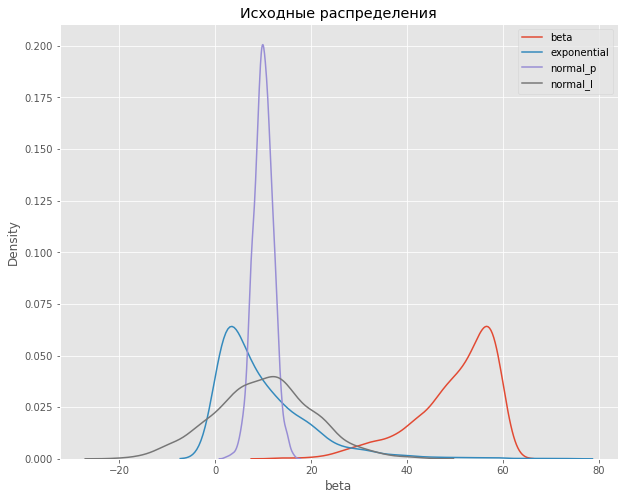

In [2]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [3]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

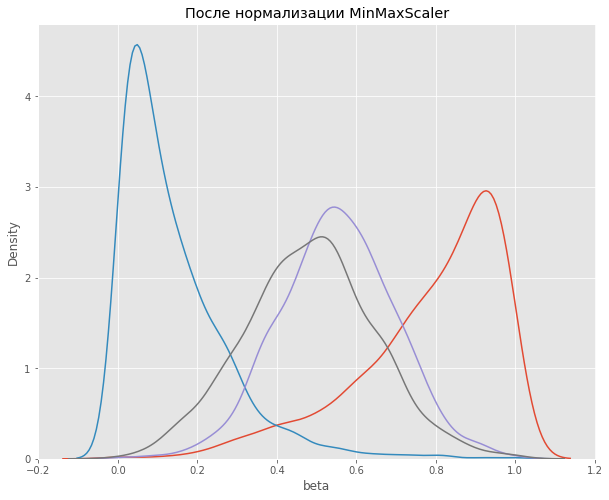

In [4]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [5]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

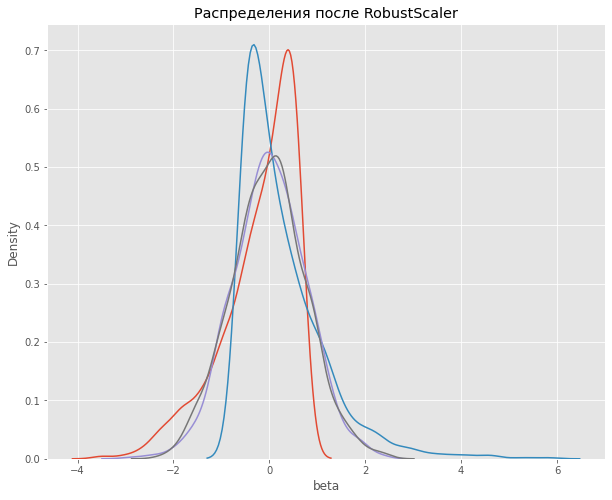

In [6]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [7]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

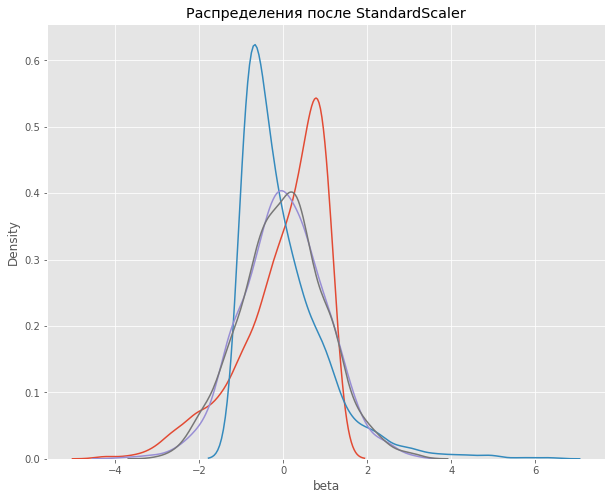

In [8]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [9]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


<AxesSubplot:ylabel='Frequency'>

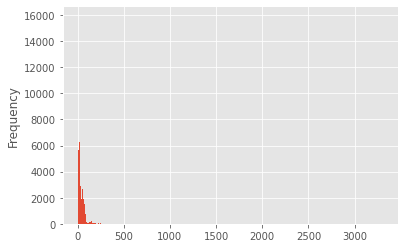

In [31]:
data['price'].plot(kind='hist', bins=1000)

In [40]:
data_to_standart = pd.Series(data = data['price'].values,
                            index = data['price'].index)

In [45]:
data_to_standart

0         35.363389
1         15.000000
2         14.000000
3         13.000000
4         65.000000
            ...    
129966    28.000000
129967    75.000000
129968    30.000000
129969    32.000000
129970    21.000000
Length: 129972, dtype: float64

fig = plt.figure(figsize=(10, 5))

In [53]:
data['price']

0         35.363389
1         15.000000
2         14.000000
3         13.000000
4         65.000000
            ...    
129966    28.000000
129967    75.000000
129968    30.000000
129969    32.000000
129970    21.000000
Name: price, Length: 129972, dtype: float64

In [54]:
data[['price']]

,price
0,35.363389
1,15.000000
2,14.000000
3,13.000000
4,65.000000
...,...
129966,28.000000
129967,75.000000
129968,30.000000
129969,32.000000


In [59]:
# Нормализовать признак price можно вот так:
df = pd.read_csv('data/wine_cleared.csv')
scaler = preprocessing.StandardScaler()

df['price_sc'] = scaler.fit_transform(df[['price']])
df.loc[129968, 'price_sc']

-0.13551812448719314

In [60]:
#Если хотите нормировать только одну колонку и перезаписать ее в исходном датафрейме, 
#а остальные оставить как есть, то нужно сделать так:
r_scaler = preprocessing.RobustScaler()
data_r = r_scaler.fit_transform(data[['price']])
data['price'] = data_r

In [62]:
data['price'].sum()

43500.77493697044

Вопрос по нормализации и стандартизации:
Почему при MinMaxScaler и других методах, нам необходимо делать fit? ( по сути метод применяет же просто формулу и решение можно найти аналитически ). Что в данном случае делает   метод fit?
Почему иногда делают fit и transform отдельно, а иногда fit_transform вместе?

Добрый день!
fit - это обучение скейлера, решение здесь, действительно, получается аналитически, никакого обучения в классическом его понимании не происходит. Но на этом этапе в объект scaler = MinMaxScaler() помещается информация о данных и некоторая функция перевода исходной информации в отмасштабированную. Это полезно, например, когда мы получаем на вход новые данные, то можем применить к ним "обученный" scaler и получить на выходе нормализованные в том же масштабе, который был получен при fit.
А transform переводит масштабированные данные в наглядный вид, т.е. в матрицу чисел, которую уже можно непосредственно использовать в дальнейшей работе.
Довольно часто используют метод fit_transform (он эквивалентен последовательному применению fit + transform), который сразу и обучает scaler, и выдаёт матрицу чисел :легкая_улыбка:

In [64]:
import pandas as pd
iris = pd.read_csv('data/iris.csv')

In [65]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

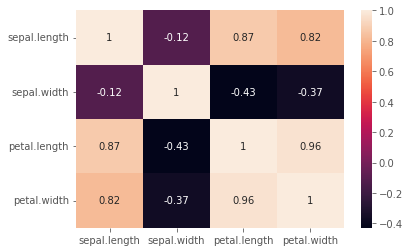

In [66]:
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [67]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

In [68]:
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


Figure(504x504) ((<AxesSubplot:>, <AxesSubplot:>), (<AxesSubplot:>, <AxesSubplot:>))


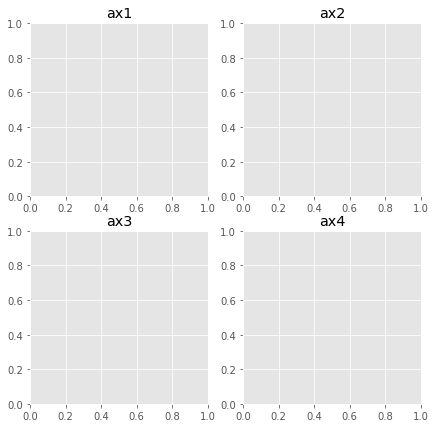

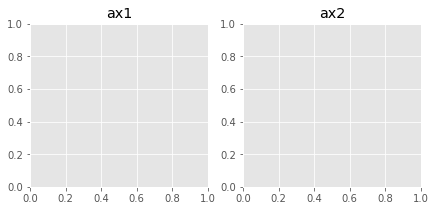

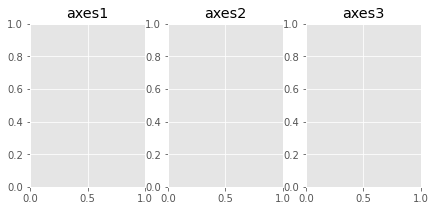

In [88]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
# можно посмотреть, что возвращает plt.subplots()
print(fig, ((ax1,ax2),(ax3,ax4)))
# возвращает объект figure
# возвращает объекты Axes
# объекты Axes записываются в переменные. Скобки указывают что это:
# 1. Объекты Axes (общая скобка)
# 2. распределяют по строкам и столбцам (внутренние скобки). 

ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')
ax4.set_title('ax4')

fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax1.set_title('ax1')
ax2.set_title('ax2')

fig3, (axes1,axes2,axes3) = plt.subplots(nrows=1, ncols=3, figsize=(7,3))
axes1.set_title('axes1')
axes2.set_title('axes2')
axes3.set_title('axes3');

In [69]:
data.corr()

,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,old_wine,area,country_0,country_1,country_2,country_3,country_4,country_5
Unnamed: 0,1.000000,0.007125,0.004648,0.004662,0.010928,-0.002187,-0.010178,-0.020657,0.011775,0.003732,0.002809,-0.001704,-0.001534,0.010816,0.002517
points,0.007125,1.000000,0.402136,0.402064,0.032592,0.059248,0.015926,-0.046069,0.023427,-0.013685,-0.018852,-0.036594,-0.019548,0.031306,0.062680
price,0.004648,0.402136,1.000000,0.999997,0.025873,0.053139,0.039566,0.055670,0.021446,-0.019886,-0.019101,-0.070159,0.003017,-0.016842,0.085449
price_round,0.004662,0.402064,0.999997,1.000000,0.026379,0.052615,0.039314,0.055568,0.021984,-0.019860,-0.019060,-0.070117,0.002713,-0.016389,0.085427
is_usa,0.010928,0.032592,0.025873,0.026379,1.000000,-0.384584,-0.357477,-0.007442,0.966549,-0.037007,-0.082210,-0.302466,-0.542348,0.757849,0.412552
is_france,-0.002187,0.059248,0.053139,0.052615,-0.384584,1.000000,-0.190359,-0.082791,-0.398449,-0.019707,-0.043777,-0.161066,0.709109,-0.507468,0.219687
is_italy,-0.010178,0.015926,0.039566,0.039314,-0.357477,-0.190359,1.000000,0.085611,-0.393994,-0.018318,-0.040692,-0.149713,-0.268448,-0.471699,0.204202
old_wine,-0.020657,-0.046069,0.055670,0.055568,-0.007442,-0.082791,0.085611,1.000000,0.007465,-0.010474,-0.017017,0.036894,-0.056428,-0.037974,0.027841
area,0.011775,0.023427,0.021446,0.021984,0.966549,-0.398449,-0.393994,0.007465,1.000000,-0.039419,-0.027564,-0.221510,-0.534342,0.743601,0.434861
country_0,0.003732,-0.013685,-0.019886,-0.019860,-0.037007,-0.019707,-0.018318,-0.010474,-0.039419,1.000000,-0.004213,0.001312,-0.018813,0.012819,-0.015808


In [46]:
heart_data = pd.read_csv('data/heart.csv')

In [100]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,-114
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-127
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,-114
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,-121
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,-114
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,-114


In [74]:
heart_data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [47]:
heart_data['old'] = heart_data['age'].apply(lambda x: 1 if x>60 else 0)

In [78]:
heart_data['old'].sum()

79

Возраст (лет)	Мужчины	Женщины
до 20	123/76	116/72
21-30	126/79	120/75
31-40	129/81	127/80
41-50	135/83	137/84
51-60	142/85	144/85
61 и старше	142/80	159/85

In [48]:
def trest_man(feature):
    if (feature < 21):
        return 123
    if (feature >= 21) and (feature < 31):
        return 126
    if (feature >= 31) and (feature < 41):
        return 129
    if (feature >= 41) and (feature < 51):
        return 135
    if (feature >= 51) and (feature < 61):
        return 142
    if (feature >= 61):
        return 142
    
def trest_woman(feature):
    if (feature < 21):
        return 116
    if (feature >= 21) and (feature < 31):
        return 120
    if (feature >= 31) and (feature < 41):
        return 127
    if (feature >= 41) and (feature < 51):
        return 137
    if (feature >= 51) and (feature < 61):
        return 144
    if (feature >= 61):
        return 159

In [49]:
# создаем столбец с именем 'trestbps_mean' и заполняем его каким-нибудь значением:
heart_data['trestbps_mean'] = 0
heart_data.loc[heart_data['sex'] == 1, 'trestbps_mean'] = heart_data['age'].apply(trest_man)
heart_data.loc[heart_data['sex'] == 0, 'trestbps_mean'] = heart_data['age'].apply(trest_woman)

In [12]:
heart_data.loc[300, 'trestbps_mean']

142

            max_speed  shield
cobra               1       2
viper               4       5
sidewinder          7       8

Единая этикетка. Обратите внимание, что это возвращает строку как серию.
df.loc['viper']
max_speed    4
shield       5
Name: viper, dtype: int64

Список ярлыков. Обратите внимание, что использование [[]]возвращает DataFrame.
df.loc[['viper', 'sidewinder']]
            max_speed  shield
viper               4       5
sidewinder          7       8

Одна метка для строки и столбца
df.loc['cobra', 'shield']
2

Срез с метками для строки и одной меткой для столбца. Как упоминалось выше, обратите внимание, что включены как начало, так и конец среза.
df.loc['cobra':'viper', 'max_speed']
cobra    1
viper    4
Name: max_speed, dtype: int64

Условное выражение, которое возвращает логический ряд
df.loc[df['shield'] > 6]
            max_speed  shield
sidewinder          7       8


Условие, которое возвращает логический ряд с указанными метками столбцов.
df.loc[df['shield'] > 6, ['max_speed']]
            max_speed
sidewinder          7

Установить значение для всех элементов, соответствующих списку меток
df.loc[['viper', 'sidewinder'], ['shield']] = 50
df
            max_speed  shield
cobra               1       2
viper               4      50
sidewinder          7      50

Установить значение для всей строки
df.loc['cobra'] = 10
df
            max_speed  shield
cobra              10      10
viper               4      50
sidewinder          7      50

Установить значение для всего столбца
df.loc[:, 'max_speed'] = 30
df
            max_speed  shield
cobra              30      10
viper              30      50
sidewinder         30      50

Установить значение для строк, соответствующих вызываемому условию
df.loc[df['shield'] > 35] = 0
df
            max_speed  shield
cobra              30      10
viper               0       0
sidewinder          0       0

In [99]:
import numpy as np

# Для каждого значения возраста в data_heart создаем интервал, которому он принадлежит.
# Границы интервалов задаем через bins:
age_intervals = pd.cut(heart_data.age, bins=[0, 20, 30, 40, 50, 60, np.inf]) #np.inf - плюс бесконечность

# Создаем словари, задающие среднее значение верхнего давления.
# Ключ словаря: индекс интервала, значение: среднее значение давления
trestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}
trestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}

# создаем столбец с именем 'trestbps_mean' и заполняем его каким-нибудь значением:
heart_data['trestbps_mean'] = 0

# получаем индекс интервала возраста и используем его как ключ для словаря с давлением,
# из которого получаем нужное значение:
heart_data.loc[heart_data.sex == 1, 'trestbps_mean'] = age_intervals.cat.codes.replace(trestbps_man)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,-114
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-127
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,-114
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [97]:
age_intervals #сколько и строк!

0       (60.0, inf]
1      (30.0, 40.0]
2      (40.0, 50.0]
3      (50.0, 60.0]
4      (50.0, 60.0]
           ...     
298    (50.0, 60.0]
299    (40.0, 50.0]
300     (60.0, inf]
301    (50.0, 60.0]
302    (50.0, 60.0]
Name: age, Length: 303, dtype: category
Categories (6, interval[float64, right]): [(0.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, inf]]

In [14]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


In [29]:
for elem in heart_data.columns:
    print(elem, heart_data[elem].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

In [30]:
heart_data = pd.get_dummies(heart_data, columns=['cp', 'restecg', 'slope', 'ca', 'thal']) #c удалением исходных признаков

In [52]:
import category_encoders as ce #без удаления исходных признаков
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
encoder_bin = encoder.fit_transform(heart_data[['cp', 'restecg', 'slope', 'ca', 'thal']])

heart_data = pd.concat([heart_data, encoder_bin], axis=1)

In [53]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'old',
       'trestbps_mean', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_1',
       'restecg_2', 'restecg_3', 'slope_1', 'slope_2', 'slope_3', 'ca_1',
       'ca_2', 'ca_3', 'ca_4', 'ca_5', 'thal_1', 'thal_2', 'thal_3', 'thal_4'],
      dtype='object')

In [15]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'old',
       'trestbps_mean'],
      dtype='object')

In [22]:
heart_data['age'].nunique()

41

In [54]:
len(heart_data.columns)

35

In [33]:
import numpy as np 
import pandas as pd
# для нормализации, стандартизации
from sklearn import preprocessing
# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

<AxesSubplot:xlabel='thalach', ylabel='Count'>

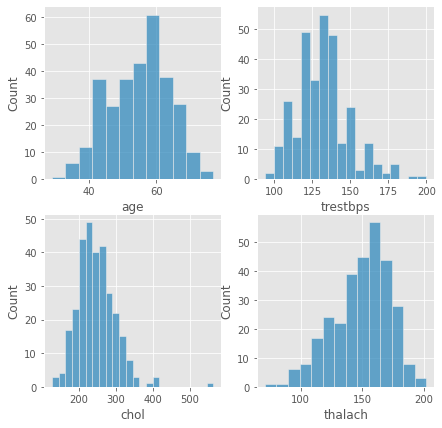

In [39]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
sns.histplot(data = heart_data, x='age', ax = ax1)
sns.histplot(data = heart_data, x='trestbps', ax = ax2) #есть выбросы
sns.histplot(data = heart_data, x='chol', ax = ax3) #есть выбросы -> RobustScaler
sns.histplot(data = heart_data, x='thalach', ax = ax4)

In [55]:
r_scaler = preprocessing.RobustScaler()
data_r = r_scaler.fit_transform(heart_data[['chol']])
heart_data['chol'] = data_r

In [42]:
heart_data['chol'].std()

0.8162322990225203

<AxesSubplot:>

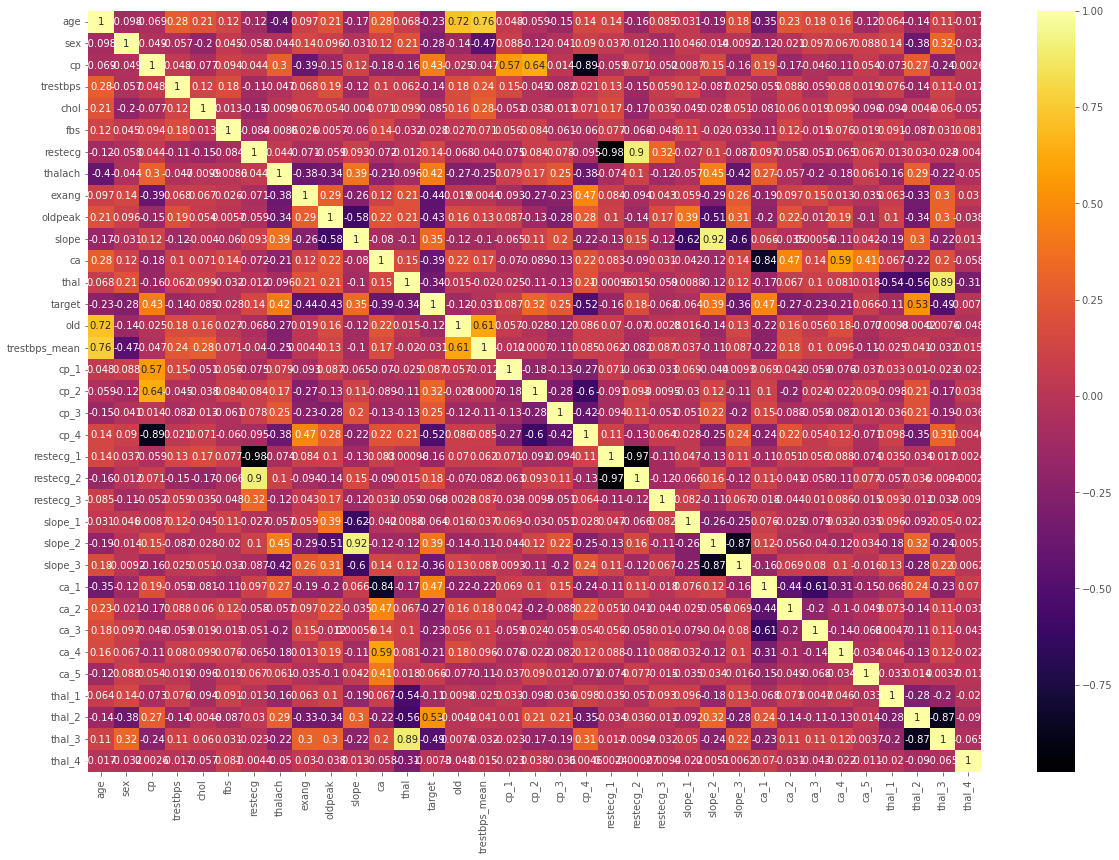

In [56]:
fig = plt.figure(figsize=(20, 14))
sns.heatmap(data = heart_data.corr(), cmap='inferno', annot = True)